In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split


In [58]:
df = pd.read_csv("/Users/baobach/ML-Projects/ml-nft-price-predictor/data/NFT_traits.csv").set_index("token_id")
df.head()

,TRAITS_COUNT,EARRING,BACKGROUND,FUR,EYES,MOUTH,HAT,CLOTHES,PRICE
token_id,,,,,,,,,
1,5,NaN,Orange,Robot,Blue Beams,Grin,NaN,Vietnam Jacket,71.95
2,5,NaN,Aquamarine,Robot,3d,Bored Cigarette,Sea Captain's Hat,NaN,71.95
3,5,NaN,Purple,Cheetah,Bored,Tongue Out,NaN,Bone Necklace,71.95
4,6,NaN,Blue,Golden Brown,Closed,Phoneme L,Party Hat 2,Navy Striped Tee,71.95
5,6,NaN,Army Green,Brown,X Eyes,Dumbfounded,Bayc Flipped Brim,Bayc T Red,71.95


In [48]:
mask = df["PRICE"] <= 80
df = df[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 1 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAITS_COUNT  8961 non-null   int64  
 1   EARRING       2622 non-null   object 
 2   BACKGROUND    8961 non-null   object 
 3   FUR           8961 non-null   object 
 4   EYES          8961 non-null   object 
 5   MOUTH         8961 non-null   object 
 6   HAT           6949 non-null   object 
 7   CLOTHES       7264 non-null   object 
 8   PRICE         8961 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 700.1+ KB


<AxesSubplot: >

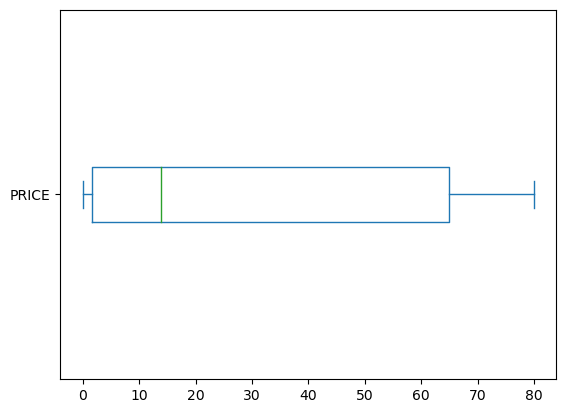

In [51]:
df["PRICE"].plot(kind="box", vert=False)

In [47]:
df["PRICE"].describe(percentiles = [0.1,0.5,0.9])

count    9909.000000
mean       36.282638
std        35.786208
min         0.000000
10%         0.500000
50%        24.500000
90%        80.000000
max       149.960000
Name: PRICE, dtype: float64

In [52]:
target = "PRICE"
X = df.drop(columns=target)
y = df[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7168, 8)
y_train shape: (7168,)
X_test shape: (1793, 8)
y_test shape: (1793,)


---
Build model

In [56]:
# Find the mean of the train data set
y_mean = y_train.mean()

# Create a list of this mean -> multiply the varible to the number of total data points
y_pred_baseline = [y_mean] * len(y_train)

# Find the Mean Absolute Error of the Baseline
mae_baseline = mean_absolute_error (y_train, y_pred_baseline)
print("Mean ape price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean ape price: 29.55
Baseline MAE: 27.85


In [38]:
model = make_pipeline(
	OneHotEncoder(use_cat_names = True),
	LinearRegression()
)

# Fit your model to the data
model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['EARRING', 'BACKGROUND', 'FUR', 'EYES',
                                     'MOUTH', 'HAT', 'CLOTHES'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [54]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 28.47333705357143


In [55]:
y_pred_test = model.predict(X_test)
print("Training MAE:", mean_absolute_error(y_test, y_pred_test))

Training MAE: 28.011885108756275


In [41]:
# Find the intercept from the {pipeline}
intercept = model.named_steps["linearregression"].intercept_.round(2)

# Find the coefficient from the {pipeline}
coefficients = model.named_steps["linearregression"].coef_.round(2)

#Extract the feature names of your encoded data from the OneHotEncoder in your model.
feature_names = model.named_steps["onehotencoder"].get_feature_names()

#Create a pandas Series named feat_imp where the index is your features and the values are your coefficients
feat_imp = pd.Series(coefficients, index=feature_names)

#Print the function
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
	print(f"+ ({round(c, 2)} * {f})")

price = 5131455693129216.0
+ (-578426708476045.8 * TRAITS_COUNT)
+ (-967973544773412.8 * EARRING_nan)
+ (-389546836297362.3 * EARRING_Gold Hoop)
+ (-389546836297365.8 * EARRING_Silver Hoop)
+ (-389546836297361.8 * EARRING_Silver Stud)
+ (-389546836297363.25 * EARRING_Gold Stud)
+ (-389546836297357.75 * EARRING_Diamond Stud)
+ (-389546836297361.8 * EARRING_Cross)
+ (-500395571537166.56 * BACKGROUND_Orange)
+ (-500395571537164.6 * BACKGROUND_Yellow)
+ (-500395571537163.5 * BACKGROUND_Aquamarine)
+ (-500395571537165.4 * BACKGROUND_Army Green)
+ (-500395571537165.8 * BACKGROUND_Purple)
+ (-500395571537165.06 * BACKGROUND_New Punk Blue)
+ (-500395571537164.8 * BACKGROUND_Blue)
+ (-500395571537162.0 * BACKGROUND_Gray)
+ (-176923726580093.56 * FUR_Black)
+ (-176923726580092.94 * FUR_Cream)
+ (-176923726580094.94 * FUR_Red)
+ (-176923726580085.2 * FUR_Trippy)
+ (-176923726580093.8 * FUR_Cheetah)
+ (-176923726580094.5 * FUR_Brown)
+ (-176923726580095.0 * FUR_Dark Brown)
+ (-176923726580096.2 * 